In [1]:
from add_parent_dir import *
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
from code_embedding import *
import pickle
from itertools import combinations

## [[5,1,3]] 

#### Define code

In [2]:
n_og = 5

n = 5
k = 1 
d = 3

stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)

## Pairwise CNOT columns

In [3]:
H_symp_embedded = qec_embed_code(H_symp, embedding = 'all_weight_2').embed_mat()
n = H_symp_embedded.shape[1]//2

#### Standard form of code

In [4]:
G, LX, LZ, D = compute_standard_form(H_symp_embedded)

#### Automorphism group generators from MAGMA

In [5]:
code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp_embedded).run(fileroot='./')
# filename = f'./auts_n{n}k{k}d{d}.pkl'
# with open(filename, 'rb') as f:
#     code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  1440
Time:  0.32
No of aut gens:  7


#### Circuits of automorphism group generators

In [6]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp_embedded,aut)        
    phys_circ, _ = phys_act.circ()
    log_act, circ = logical_circ_and_pauli_correct(H_symp_embedded,phys_circ).run()
    circuits.append((log_act,circ))

### Logical gate 1

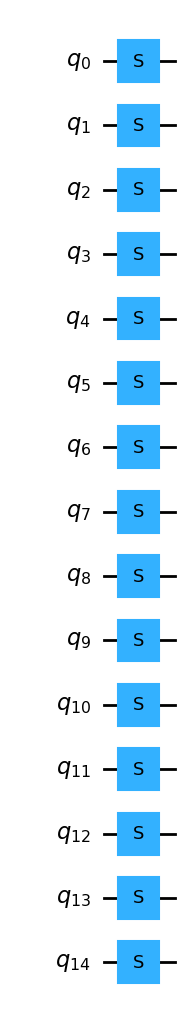

In [7]:
# physical circuit
log_act, phys_circ = circuits[0]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

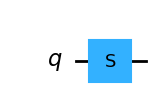

In [8]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 2

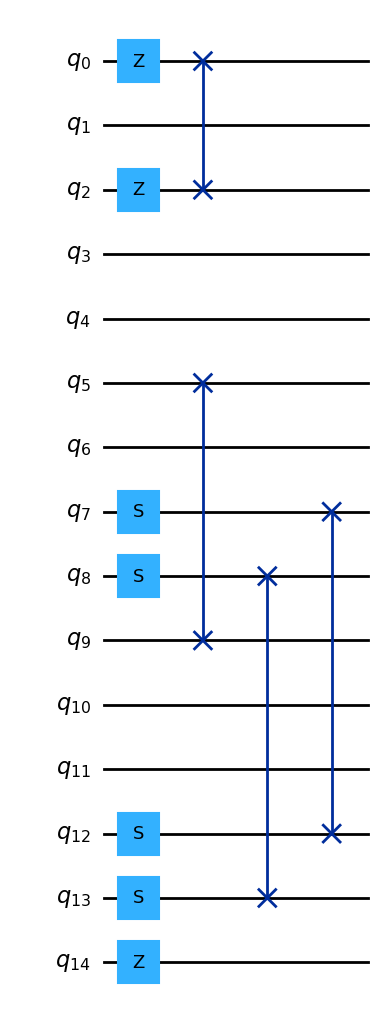

In [9]:
# physical circuit
log_act, phys_circ = circuits[1]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

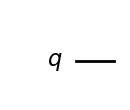

In [10]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 3

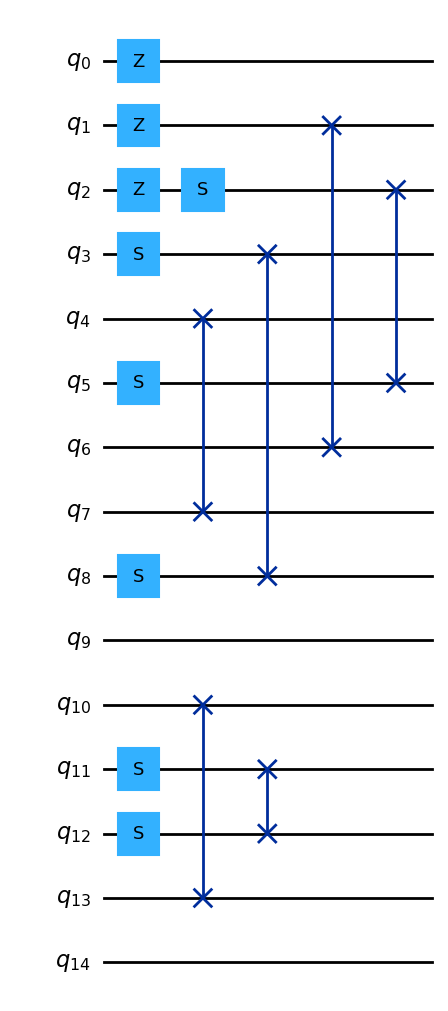

In [11]:
# physical circuit
log_act, phys_circ = circuits[2]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

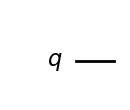

In [12]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 4

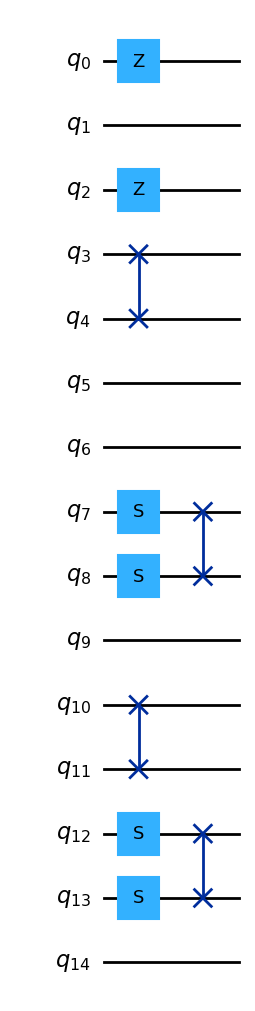

In [13]:
# physical circuit
log_act, phys_circ = circuits[3]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

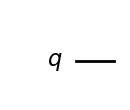

In [14]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 5

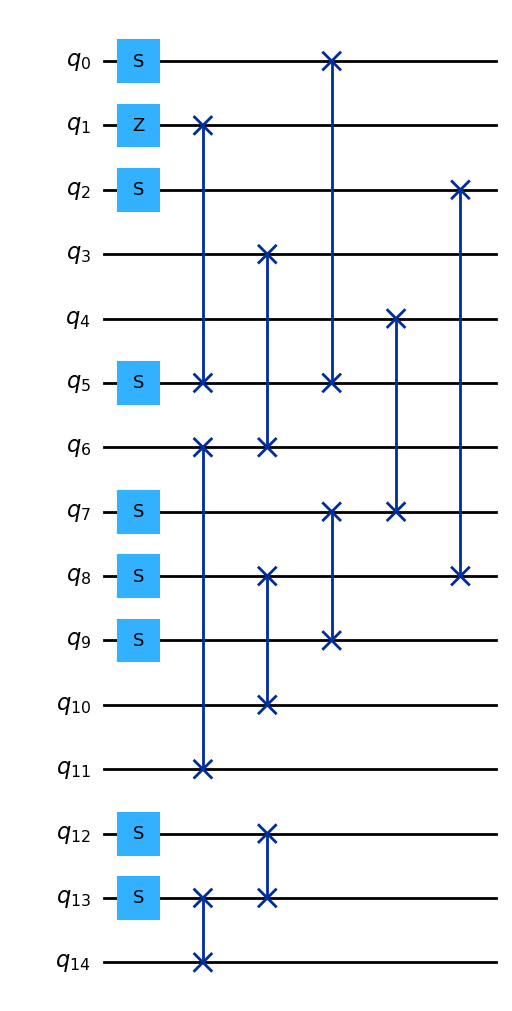

In [15]:
# physical circuit
log_act, phys_circ = circuits[4]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

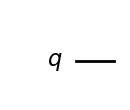

In [16]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 6

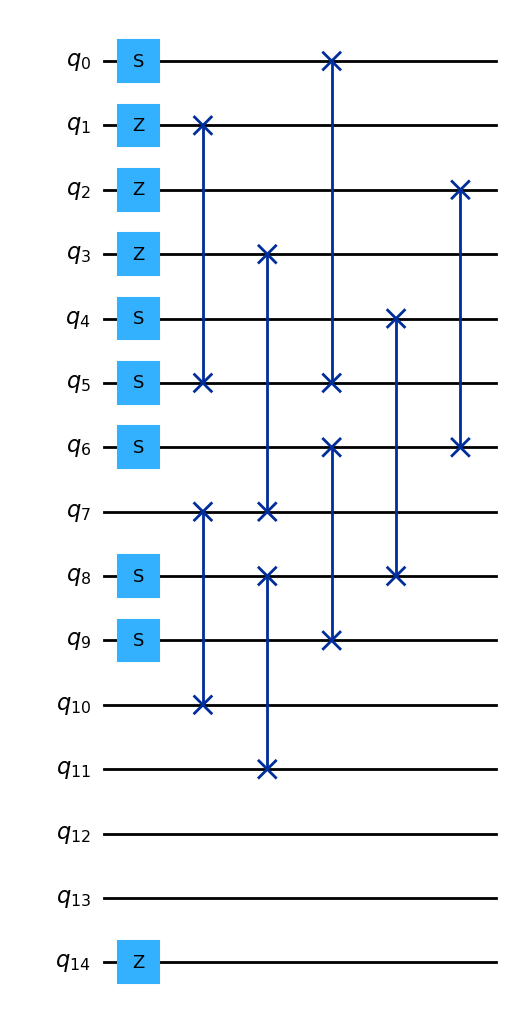

In [17]:
# physical circuit
log_act, phys_circ = circuits[5]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

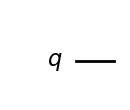

In [18]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

### Logical gate 7

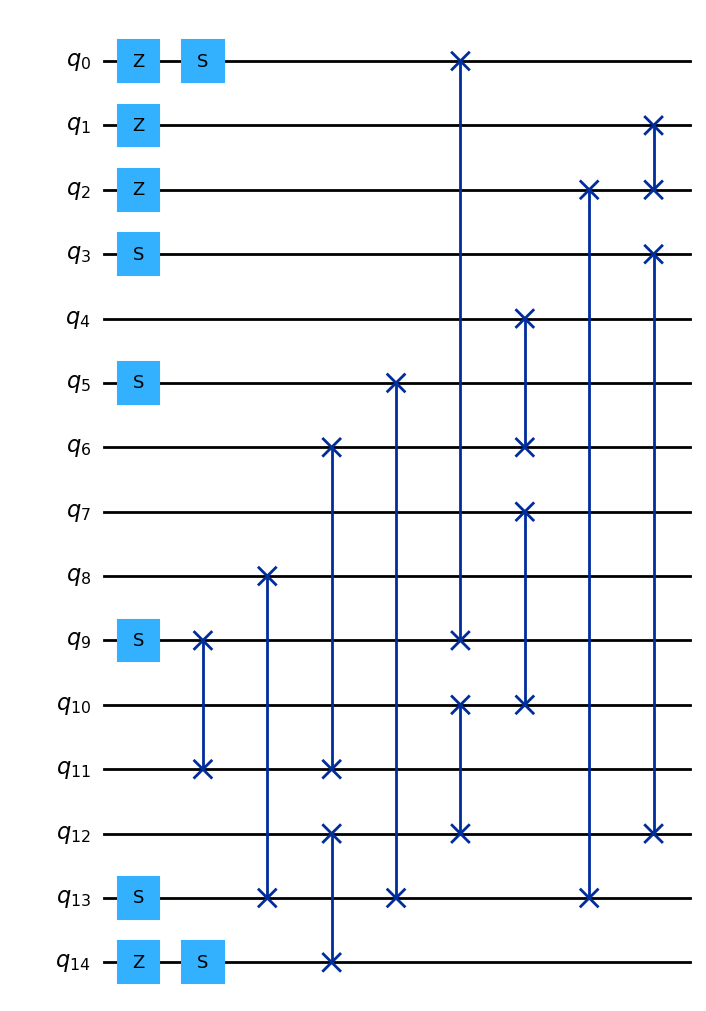

In [19]:
# physical circuit
log_act, phys_circ = circuits[6]
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

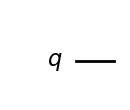

In [20]:
# logical circuit
qc = construct_circuit(log_act, k)
qc.draw(output='mpl')

# Embedded basis to normal basis

In [21]:
embed_codespace_dict = {1: (1,2),
                        2: (1,3),
                        3: (1,4),
                        4: (1,5),
                        5: (2,3),
                        6: (2,4),
                        7: (2,5),
                        8: (3,4),
                        9: (3,5),
                        10: (4,5)}

In [22]:
embedded_circuits = circuits.copy()
new_circuits = []
for embed_circ in embedded_circuits:
    new_circ = embed_circ_to_normal_circ(embed_circ[1], n_og,embed_codespace_dict)
    new_circuits.append(new_circ)

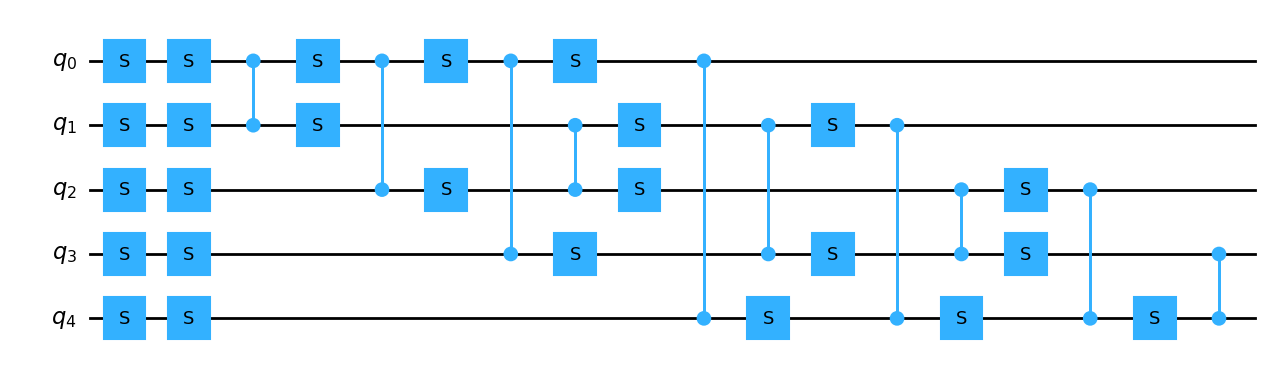

In [23]:
qc = construct_circuit(new_circuits[0], n_og)
qc.draw(output='mpl')